AI For Social Good Club - Sign Language Project

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
train_df = 'sign_mnist_train/sign_mnist_train.csv' 
test_df = 'sign_mnist_test/sign_mnist_test.csv'

train_df = pd.read_csv(train_df)
test_df = pd.read_csv(test_df)

In [6]:
train_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179


Understanding the Data

Labels correspond to gestures which represent the alphabet. This dataset has labels ranging from 0 to 24. Per Kaggle (our source), there are no cases for 9 (J) or 25 (Z) because these require motions.

Together, each pixel column forms a single 28x28 pixel image.


In [7]:
print(train_df['label'].min())
print(train_df['label'].max())

0
24


Visualizations

We will create a bar chart showing the number of instances of each label in the dataset. This gives us an idea of the distribution of the classes and if there is any class imbalance

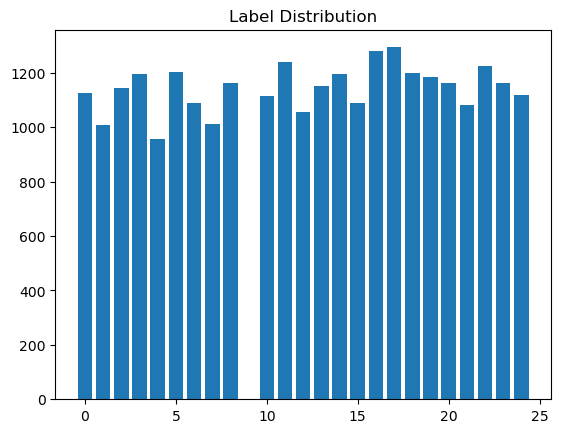

In [8]:
label_counts = train_df['label'].value_counts()
plt.bar(label_counts.index, label_counts.values)
plt.title('Label Distribution')
plt.show()


Here, we visualize random images from the dataframe.

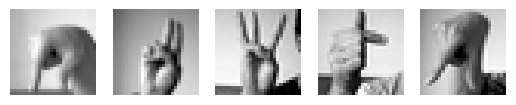

In [9]:
rand_images = train_df.sample(n=5)
images = rand_images.drop('label', axis=1).values.reshape(-1, 28, 28)


fig, axs = plt.subplots(nrows=1, ncols=5)
for i, ax in enumerate(axs):
    ax.imshow(images[i], cmap='gray')
    ax.axis('off')
plt.show()

Here, we visualize the pixel intensity distributions for each pixel across all the images in the dataset.

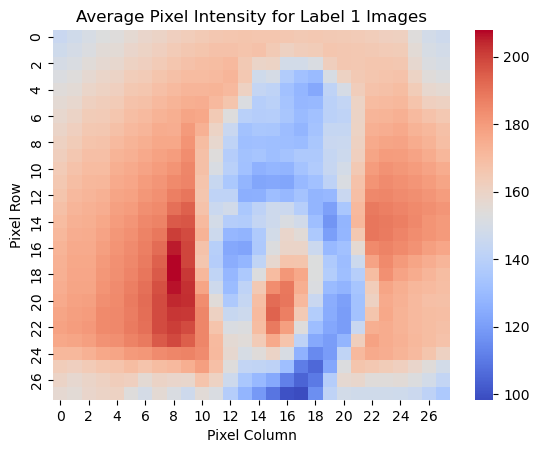

In [10]:
label_1_pixels = train_df.loc[train_df['label'] == 1].drop('label', axis = 1)

avg_pixel_intensity = label_1_pixels.mean()

avg_pixel_intensity = avg_pixel_intensity.values.reshape(28, 28)

sns.heatmap(avg_pixel_intensity, cmap='coolwarm')
plt.title('Average Pixel Intensity for Label 1 Images')
plt.xlabel('Pixel Column')
plt.ylabel('Pixel Row')
plt.show()

Preprocessing

In [11]:
from sklearn.model_selection import train_test_split
train_df = train_df.sample(frac=0.4, random_state=42)

train_images = train_df.values[:,1:]


train_images = np.reshape(train_images, (train_images.shape[0], 28, 28, 1))


X_train, X_test, y_train, y_test = train_test_split(train_images, train_df.iloc[:, 0], test_size=0.2, random_state=42)


In [12]:
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

In [13]:
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

Model

In [14]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten
from keras.utils import to_categorical


y_train = to_categorical(y_train, num_classes=25)
y_test = to_categorical(y_test, num_classes=25)


model = Sequential()


model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))


model.add(Flatten())


model.add(Dense(25, activation='softmax'))


model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


# Fit the model to the training data
model.fit(X_train, y_train, batch_size=64, epochs=12, validation_data=(X_test, y_test))



Epoch 1/12
138/138 [==============================] - 6s 41ms/step - loss: 2.0136 - accuracy: 0.4574 - val_loss: 1.0045 - val_accuracy: 0.7592
Epoch 2/12
138/138 [==============================] - 5s 36ms/step - loss: 0.7447 - accuracy: 0.8283 - val_loss: 0.5123 - val_accuracy: 0.8935
Epoch 3/12
138/138 [==============================] - 4s 32ms/step - loss: 0.3748 - accuracy: 0.9300 - val_loss: 0.2787 - val_accuracy: 0.9495
Epoch 4/12
138/138 [==============================] - 5s 33ms/step - loss: 0.2072 - accuracy: 0.9697 - val_loss: 0.1700 - val_accuracy: 0.9754
Epoch 5/12
138/138 [==============================] - 4s 30ms/step - loss: 0.1217 - accuracy: 0.9896 - val_loss: 0.1119 - val_accuracy: 0.9841
Epoch 6/12
138/138 [==============================] - 4s 31ms/step - loss: 0.0765 - accuracy: 0.9956 - val_loss: 0.0780 - val_accuracy: 0.9914
Epoch 7/12
138/138 [==============================] - 4s 31ms/step - loss: 0.0520 - accuracy: 0.9981 - val_loss: 0.0464 - val_accuracy: 0.9986

Testing the Model

In [15]:
def convLabelToAlphabet(label):
    if label == 0:
        return 'A'
    elif label == 1:
        return 'B'
    elif label == 2:
        return 'C'
    elif label == 3:
        return 'D'
    elif label == 4:
        return 'E'
    elif label == 5:
        return 'F'
    elif label == 6:
        return 'G'
    elif label == 7:
        return 'H'
    elif label == 8:
        return 'I'
    elif label == 10:
        return 'K'
    elif label == 11:
        return 'L'
    elif label == 12:
        return 'M'
    elif label == 13:
        return 'N'
    elif label == 14:
        return 'O'
    elif label == 15:
        return 'P'
    elif label == 16:
        return 'Q'
    elif label == 17:
        return 'R'
    elif label == 18:
        return 'S'
    elif label == 19:
        return 'T'
    elif label == 20:
        return 'U'
    elif label == 21:
        return 'V'
    elif label == 22:
        return 'W'
    elif label == 23:
        return 'X'
    elif label == 24:
        return 'Y'
    else:
        return None


In [18]:
import cv2

videoCapture = cv2.VideoCapture(0)

x1, y1 = 100, 100
x2, y2 = 350, 350


if not videoCapture.isOpened:
    print("Error opening video capture")
    exit(0)

while True:
    # Capture frame and store it in the frame variable
    ret, frame = videoCapture.read()

    captureBox = frame[y1:y2, x1:x2]
    cv2.rectangle(frame, (x1, y1), (x2, y2), (0, 255, 0), 4)


    # Convert image to grayscale
    gray = cv2.cvtColor(captureBox, cv2.COLOR_BGR2GRAY)
    gray = cv2.resize(gray, (28, 28))
    gray = np.expand_dims(gray, axis=0)
    gray = np.expand_dims(gray, axis=-1)
    gray = gray / 255.0

    label_probs = model.predict(gray)
    label = np.argmax(label_probs)
    label = convLabelToAlphabet(label)
    cv2.putText(frame, label, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)

    cv2.imshow("ASL Translation", frame)
    # Quit when escape is pressed (key code 27)
    if cv2.waitKey(1) & 0xFF == 27:
        break

# Release the video capture
videoCapture.release()

# Destroy all windows
cv2.destroyAllWindows()


1/1 [==============================] - 0s 26ms/step
